In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import wordcloud
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# 1.Read data

In [2]:
path = 'data/output1.csv'
df_data = pd.read_csv(path, encoding='UTF-8')
df_initial = df_data.copy()
df_initial

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,include_food
0,0,1,7,27,Jinsei Sushi,4.7,63,"Sushi, Asian, Japanese",1,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,1
1,1,2,14,51,Panera 521 Fieldstown Road,4.6,44,"Breakfast and Brunch, salad, Sandwich, Family ...",1,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,0
2,2,3,16,88,Jeni's Splendid Ice Cream Pepper Place,5.0,20,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,1
3,3,4,19,30,Falafel Cafe,4.9,48,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,1
4,4,5,20,40,MrBeast Burger 838 Odum Road,3.7,19,"American, Burgers, Sandwich",2,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19113,19113,19114,40223,54,Mangia la pasta! 5610 N Interstate Hwy 35,4.8,500,"Pasta, Comfort Food, Italian, Group Friendly",1,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441,0
19114,19114,19115,40224,53,Wholly Cow Burgers S Lamar,4.6,245,"American, Burgers, Breakfast and Brunch, Aller...",1,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821,1
19115,19115,19116,40225,52,EurAsia Ramen 3,4.7,293,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",1,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200,0
19116,19116,19117,40226,51,Austin's Habibi 5th St,4.7,208,"Mediterranean, Gluten Free Friendly, Allergy F...",2,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110,0


# 2. ramdon sample

In [3]:
n = 350
df_1 = df_initial[(df_initial.include_food == 1) & (df_initial.price_range == 1)].sample(n, random_state=1)
df_2 = df_initial[(df_initial.include_food == 1) & (df_initial.price_range > 1)].sample(n, random_state=1)
df_3 = df_initial[(df_initial.include_food == 0) & (df_initial.price_range == 1)].sample(n, random_state=1)
df_4 = df_initial[(df_initial.include_food == 0) & (df_initial.price_range > 1)].sample(n, random_state=1)
df = pd.concat([df_1, df_2, df_3, df_4])
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,include_food
0,11916,11917,25452,2,7-Eleven 1924 Walnut Ln,4.5,11,"Everyday Essentials, Grocery, Convenience, Hom...",1,"1924 Walnut Ln, Chester, VA, 23836",23836,37.330980,-77.323730,1
1,2786,2787,7992,169,T &amp; T Seafood Restaurant,4.5,15,"Chinese, Asian, Asian Fusion",1,"22511 Highway 99, Edmonds, WA, 98026",98026,47.795111,-122.334961,1
2,7422,7423,16962,8,MOD Pizza Harbor Hill,4.8,20,"Pizza, Desserts, Salads, American, Healthy, Ve...",1,"4726 Borgen Blvd, Gig Harbor, WA, 98332",98332,47.359473,-122.601883,1
3,6072,6073,14445,7,Taco Bell 6614 N Division St,4.4,147,"Burritos, Fast Food, Mexican",1,"6614 N Division St, Spokane, WA, 99208",99208,47.717852,-117.410674,1
4,15020,15021,32032,14,Jersey Mike__ Subs 756 South Main Street,4.9,19,"Sandwich, American, Comfort Food",1,"756 South Main Street, Logan, UT, 84321",84321,41.718338,-111.834907,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,8587,8588,19232,276,Rus Uz - Arlington,4.9,53,"Salads, Russian, Healthy",2,"1000 N Randolph St, Arlington, VA, 22201",22201,38.882785,-77.109820,0
1396,10944,10945,23619,23,Hooters Fredericksburg,4.7,86,"Bar Food, Wings, American, Chicken, Burgers",2,"10400 Spotsylvania Ave, Fredericksburg, VA, 22408",22408,38.243143,-77.497526,0
1397,16647,16648,35290,31,Hooters San Pedro Ave &amp; Embassy Oaks,4.6,149,"American, Bar Food, Wings, Chicken, Burgers, A...",2,"13131 San Pedro Ave, San Antonio, TX, 78216",78216,29.561603,-98.484268,0
1398,3671,3672,9778,32,Sonic 7210 Burden Boulevard,3.9,26,"American, Fast Food, Burgers",2,"7210 Burden Boulevard, Pasco, WA, 99301",99301,46.270264,-119.185971,0


In [4]:
#data.to_csv('sample.csv')

# 3.describe

In [5]:
df.describe()

,Unnamed: 0,index,id,position,score,ratings,price_range,lat,lng,include_food
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,9658.238571,9659.238571,21195.202143,71.431429,4.540071,83.100714,1.513571,39.714730,-96.996119,0.500000
std,5619.983207,5619.983207,11416.305261,71.425040,0.309005,78.186480,0.527813,5.905054,18.037285,0.500179
min,2.000000,3.000000,16.000000,1.000000,2.100000,10.000000,1.000000,18.370934,-122.940050,0.000000
25%,4747.250000,4748.250000,11927.750000,14.000000,4.400000,29.000000,1.000000,36.769684,-117.440314,0.000000
50%,9721.500000,9722.500000,21362.500000,46.000000,4.600000,57.000000,1.500000,38.917405,-96.735351,0.500000
75%,14653.250000,14654.250000,31220.750000,112.250000,4.700000,110.250000,2.000000,45.614094,-77.451071,1.000000
max,19116.000000,19117.000000,40226.000000,297.000000,5.000000,500.000000,4.000000,48.798149,-66.008630,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1400 non-null   int64  
 1   index         1400 non-null   int64  
 2   id            1400 non-null   int64  
 3   position      1400 non-null   int64  
 4   name          1400 non-null   object 
 5   score         1400 non-null   float64
 6   ratings       1400 non-null   int64  
 7   category      1400 non-null   object 
 8   price_range   1400 non-null   int64  
 9   full_address  1400 non-null   object 
 10  zip_code      1400 non-null   object 
 11  lat           1400 non-null   float64
 12  lng           1400 non-null   float64
 13  include_food  1400 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 153.2+ KB


In [7]:
import statistics as sts

A = df.score
print('mean is', sts.mean(A))
print('geometric mean is', sts.geometric_mean(A))
print('harmonic mean is', sts.harmonic_mean(A))
print('mode is', sts.mode(A))
print('median is', sts.median(A))
print('The third quartile is', sts.quantiles(A, n=4))
print('The second quartile is', sts.quantiles(A, n=3))

mean is 4.540071428571428
geometric mean is 4.528226283123767
harmonic mean is 4.514495648600419
mode is 4.7
median is 4.6
The third quartile is [4.4, 4.6, 4.7]
The second quartile is [4.5, 4.7]


([<matplotlib.axis.XTick at 0x290f820a0>], [Text(1, 0, 'sample')])

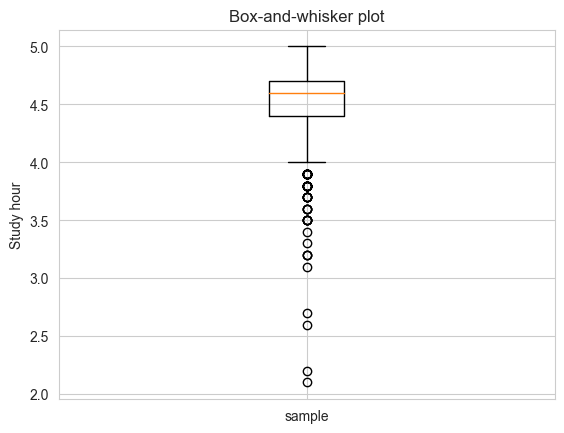

In [8]:
import matplotlib.pyplot as plt

#plt.boxplot(df['Hours'].values)
plt.boxplot(df.score)
plt.title('Box-and-whisker plot')
plt.ylabel('Study hour')
plt.xticks([1], ["sample"])

<AxesSubplot: xlabel='lng', ylabel='lat'>

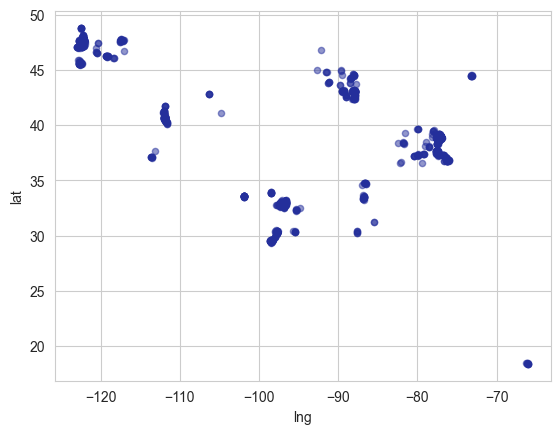

In [9]:
#plt.rcParams['figure.figsize']=(12.8, 7.2)
df.plot(kind="scatter", x="lng", y="lat", alpha=0.5,color='#242F9B')

## 3.1 Wordcloud

In [10]:
text = df.category.str.split(', ', expand=True).stack().value_counts()
nameData = pd.DataFrame(text.index)
nameData

,0
0,American
1,Burgers
2,Family Meals
3,Fast Food
4,Sandwich
...,...
175,Indonesian
176,Venezuelan
177,Modern European
178,German


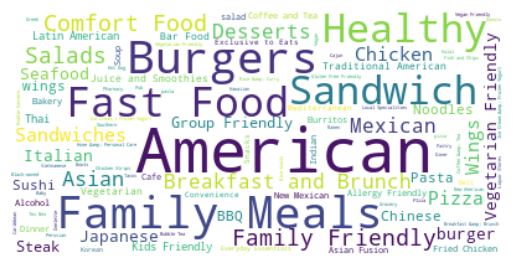

In [11]:
# Create and generate a word cloud image:
wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(
    text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3.2 correlationship

In [12]:
corr_matrix = df.corr()
corr_matrix

/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_46385/2331956095.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Unnamed: 0,index,id,position,score,ratings,price_range,lat,lng,include_food
Unnamed: 0,1.000000,1.000000,0.998896,0.091223,-0.015827,0.051113,0.002738,-0.729511,0.240087,-0.036062
index,1.000000,1.000000,0.998896,0.091223,-0.015827,0.051113,0.002738,-0.729511,0.240087,-0.036062
id,0.998896,0.998896,1.000000,0.099702,-0.010579,0.053323,0.005901,-0.711355,0.211762,-0.035652
position,0.091223,0.091223,0.099702,1.000000,0.108353,0.071194,0.107996,0.008286,-0.051696,0.039036
score,-0.015827,-0.015827,-0.010579,0.108353,1.000000,0.178798,-0.068419,0.054059,-0.020739,-0.060354
ratings,0.051113,0.051113,0.053323,0.071194,0.178798,1.000000,-0.003056,-0.031669,0.097251,-0.081729
price_range,0.002738,0.002738,0.005901,0.107996,-0.068419,-0.003056,1.000000,0.000901,-0.023139,-0.001354
lat,-0.729511,-0.729511,-0.711355,0.008286,0.054059,-0.031669,0.000901,1.000000,-0.570414,0.022887
lng,0.240087,0.240087,0.211762,-0.051696,-0.020739,0.097251,-0.023139,-0.570414,1.000000,-0.080817
include_food,-0.036062,-0.036062,-0.035652,0.039036,-0.060354,-0.081729,-0.001354,0.022887,-0.080817,1.000000


array([[<AxesSubplot: xlabel='position', ylabel='position'>,
        <AxesSubplot: xlabel='score', ylabel='position'>,
        <AxesSubplot: xlabel='ratings', ylabel='position'>,
        <AxesSubplot: xlabel='price_range', ylabel='position'>],
       [<AxesSubplot: xlabel='position', ylabel='score'>,
        <AxesSubplot: xlabel='score', ylabel='score'>,
        <AxesSubplot: xlabel='ratings', ylabel='score'>,
        <AxesSubplot: xlabel='price_range', ylabel='score'>],
       [<AxesSubplot: xlabel='position', ylabel='ratings'>,
        <AxesSubplot: xlabel='score', ylabel='ratings'>,
        <AxesSubplot: xlabel='ratings', ylabel='ratings'>,
        <AxesSubplot: xlabel='price_range', ylabel='ratings'>],
       [<AxesSubplot: xlabel='position', ylabel='price_range'>,
        <AxesSubplot: xlabel='score', ylabel='price_range'>,
        <AxesSubplot: xlabel='ratings', ylabel='price_range'>,
        <AxesSubplot: xlabel='price_range', ylabel='price_range'>]],
      dtype=object)

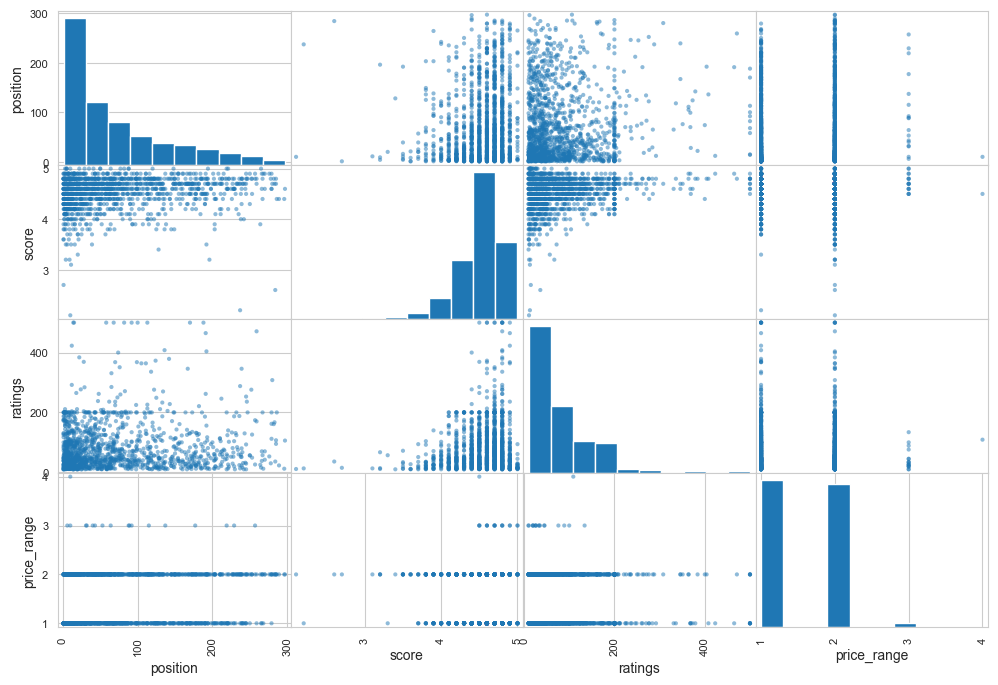

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["position", "score", "ratings",
              "price_range"]
scatter_matrix(df[attributes], figsize=(12, 8))

## 3.3 Graph by group

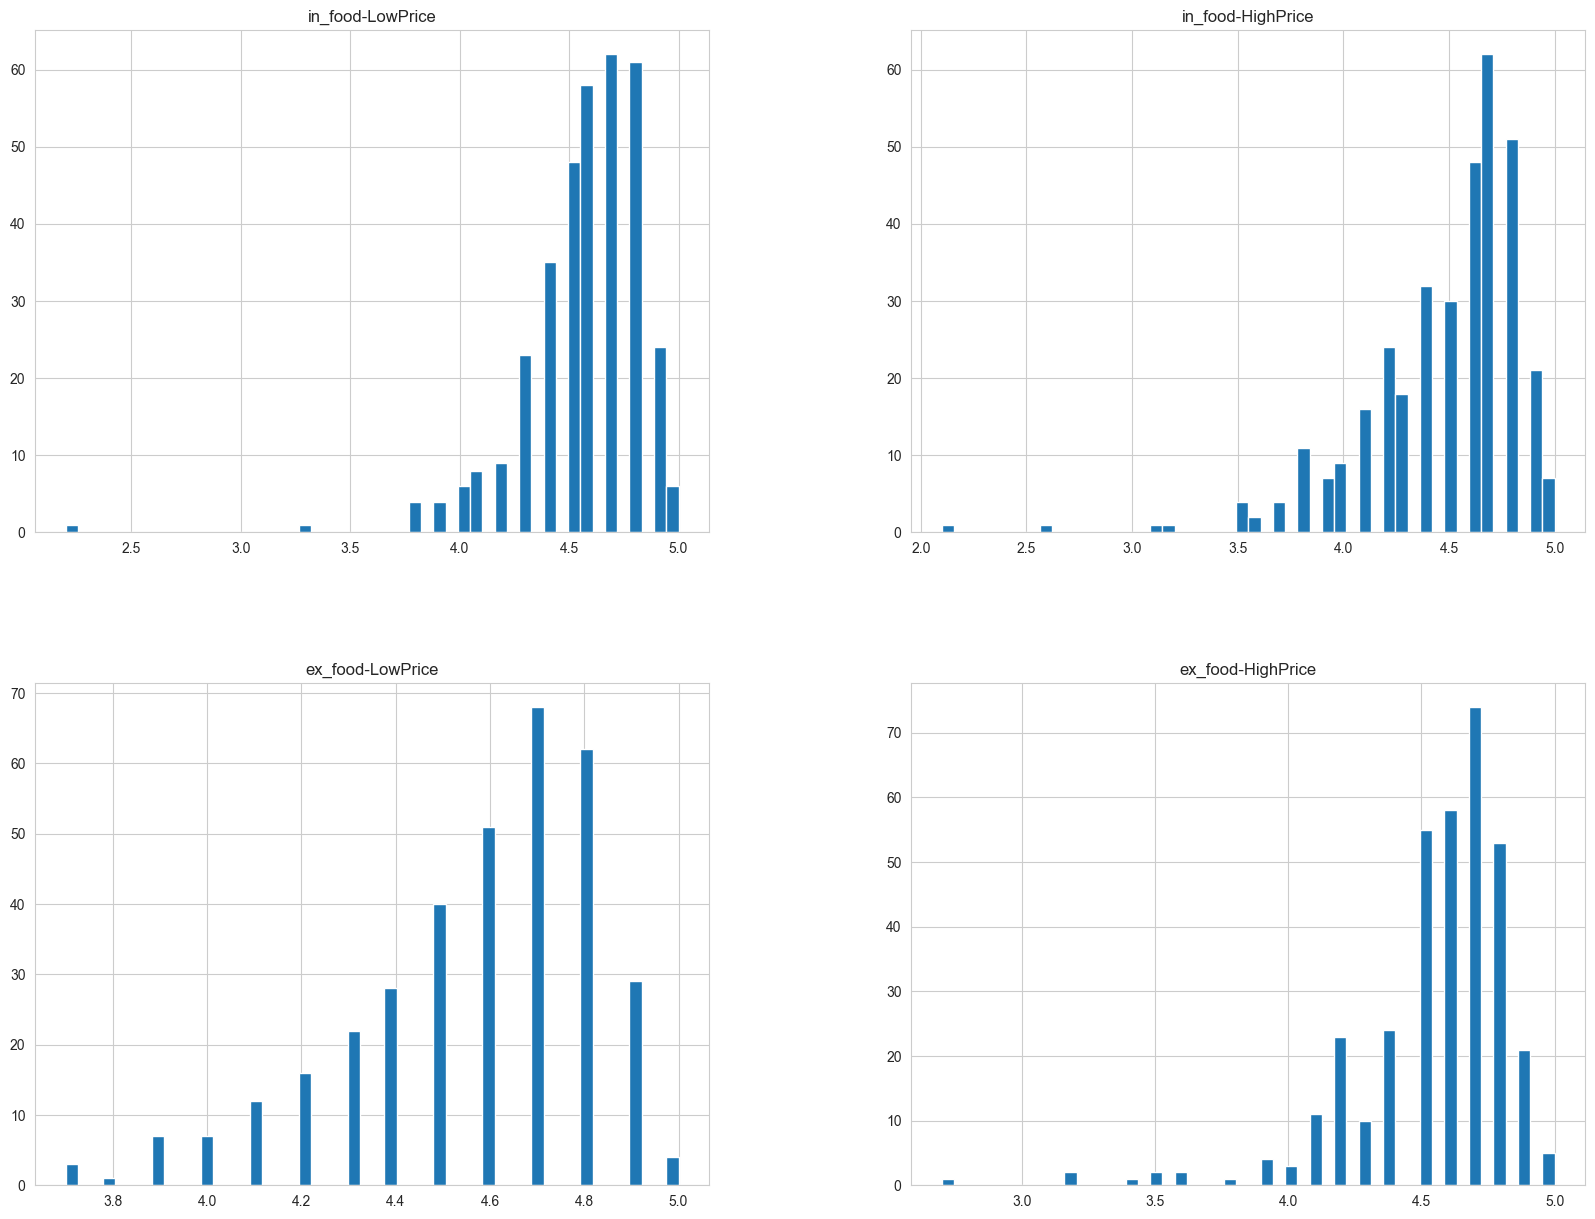

In [14]:
import matplotlib.pyplot as plt
df1 = pd.DataFrame(
    {'in_food-LowPrice': df[(df.include_food == 1) & (df.price_range == 1)].score.values})
df2 = pd.DataFrame(
    {'in_food-HighPrice': df[(df.include_food == 1) & (df.price_range > 1)].score.values})
df3 = pd.DataFrame(
    {'ex_food-LowPrice': df[(df.include_food == 0) & (df.price_range == 1)].score.values})
df4 = pd.DataFrame(
    {'ex_food-HighPrice': df[(df.include_food == 0) & (df.price_range > 1)].score.values})
# merge all dataframe objects
dataframe_ob_two = pd.concat([df1, df2, df3, df4], axis=1)
dataframe_ob_two.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

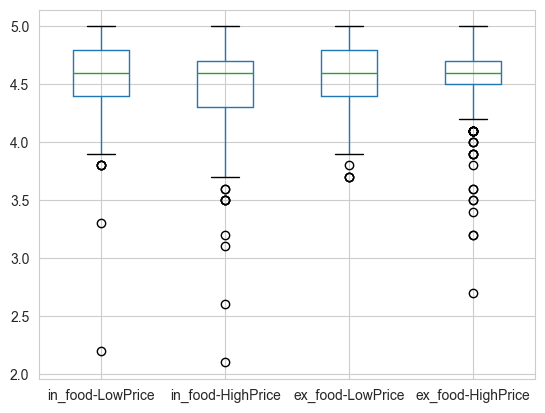

In [15]:
import matplotlib.pyplot as plt
#plt.boxplot(df['Hours'].values)
dataframe_ob_two.boxplot()

In [16]:
dataframe_ob_two.describe()

,in_food-LowPrice,in_food-HighPrice,ex_food-LowPrice,ex_food-HighPrice
count,350.000000,350.000000,350.000000,350.000000
mean,4.566857,4.476000,4.566571,4.550857
std,0.279764,0.376906,0.262776,0.296178
min,2.200000,2.100000,3.700000,2.700000
25%,4.400000,4.300000,4.400000,4.500000
50%,4.600000,4.600000,4.600000,4.600000
75%,4.800000,4.700000,4.800000,4.700000
max,5.000000,5.000000,5.000000,5.000000


# 4.Anova

## 4.1 graph of Anova

In [17]:
#Compute degrees of freedom for SSA, SSB, SSAB and SSE
r=2
c=2
n=len(dataframe_ob_two)
#SSA=r-1
dof_SSA=r-1
#SSB=c-1
dof_SSB=c-1
#SSAB=(𝑟−1)(𝑐−1)
dof_SSAB=(r-1)*(c-1)
#SSE=𝑟𝑐(𝑛' −1)
dof_SSE=r*c*(n-1)

print('For factor name variation, degrees of freedom is', dof_SSA )
print('For factor price variation, degrees of freedom is', dof_SSB )
print('For interaction variation, degrees of freedom is', dof_SSAB )
print('For random variation, degrees of freedom is', dof_SSE )

For factor name variation, degrees of freedom is 1
For factor price variation, degrees of freedom is 1
For interaction variation, degrees of freedom is 1
For random variation, degrees of freedom is 1396


critical value is 3.8481286639219743
critical value is 3.8481286639219743
critical value is 3.8481286639219743


Text(3.5481286639219745, 0.15, 'Critical Value is 3.85')

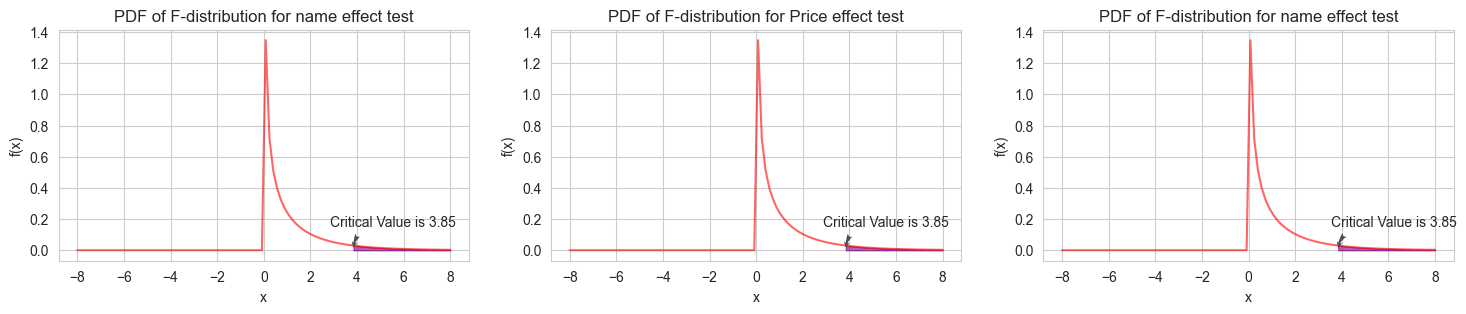

In [18]:
# Given a Type I error 5%, use the inverse function of CDF of F-distribution to compute critical value(s) of one-sided critical regions for factor and interaction effects

import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np


#generate a figure with size 12 in x 8 in and dpi=200
fig_two = plt.figure(figsize=(18, 3), dpi=100)
#the figure has 2 x 2 layout

ax1_two=fig_two.add_subplot(1,3,1)
ax2_two=fig_two.add_subplot(1,3,2)
ax3_two=fig_two.add_subplot(1,3,3)

#ax1 is the first subplot, showing the critical region of material effect test
x11 = np.linspace(-8, 8, 100)
ax1_two.plot(x11, sts.f.pdf(x11,dof_SSA, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax1_two.set_title('PDF of F-distribution for name effect test')
ax1_two.set_ylabel('f(x)')
ax1_two.set_xlabel('x')

C_value_material=sts.f.ppf(0.95, dof_SSA, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_material)
x12= np.linspace(C_value_material,8, 100)
ax1_two.fill_between(x12, sts.f.pdf(x12,dof_SSA, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax1_two.annotate(f'Critical Value is {round(C_value_material,2)}',(C_value_material,0),(C_value_material-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))


#ax2 is the second subplot, showing the critical region of temperature effect test
x21 = np.linspace(-8, 8, 100)
ax2_two.plot(x21, sts.f.pdf(x21,dof_SSB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax2_two.set_title('PDF of F-distribution for Price effect test')
ax2_two.set_ylabel('f(x)')
ax2_two.set_xlabel('x')

C_value_temperature=sts.f.ppf(0.95, dof_SSB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_temperature)
x22= np.linspace(C_value_temperature,8, 100)
ax2_two.fill_between(x22, sts.f.pdf(x22,dof_SSB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax2_two.annotate(f'Critical Value is {round(C_value_temperature,2)}',(C_value_temperature,0),(C_value_temperature-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

#ax3 is the third subplot, showing the critical region of interaction effect test
x31 = np.linspace(-8, 8, 100)
ax3_two.plot(x31, sts.f.pdf(x31,dof_SSAB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax3_two.set_title('PDF of F-distribution for name effect test')
ax3_two.set_ylabel('f(x)')
ax3_two.set_xlabel('x')


C_value_interation=sts.f.ppf(0.95, dof_SSAB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_interation)
x32= np.linspace(C_value_interation,8, 100)
ax3_two.fill_between(x32, sts.f.pdf(x32,dof_SSAB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax3_two.annotate(f'Critical Value is {round(C_value_interation,2)}',(C_value_interation,0),(C_value_interation-0.3,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

## 4.2 result of Anova

In [19]:
model = ols('score ~ C(include_food) + C(price_range)+ C(include_food):C(price_range)', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(include_food),1.0,0.486579,0.486579,5.179184,0.023010
C(price_range),3.0,1.739367,0.579789,6.171322,0.000364
C(include_food):C(price_range),3.0,0.595285,0.198428,2.112088,0.096861
Residual,1393.0,130.870803,0.093949,NaN,NaN


## 4.2 tukeyhsd

In [20]:
mc=MultiComparison(df.score,df.include_food)
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0373,0.0239,-0.0696,-0.0049,True


In [21]:
df['priceGroup']=0
for i in range(len(df)):
    if df.price_range[i] == 1:
        df.priceGroup[i] =1
    else:
        df.priceGroup[i]=2

df

/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_46385/3742121836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priceGroup[i] =1
/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_46385/3742121836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priceGroup[i]=2


,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,include_food,priceGroup
0,11916,11917,25452,2,7-Eleven 1924 Walnut Ln,4.5,11,"Everyday Essentials, Grocery, Convenience, Hom...",1,"1924 Walnut Ln, Chester, VA, 23836",23836,37.330980,-77.323730,1,1
1,2786,2787,7992,169,T &amp; T Seafood Restaurant,4.5,15,"Chinese, Asian, Asian Fusion",1,"22511 Highway 99, Edmonds, WA, 98026",98026,47.795111,-122.334961,1,1
2,7422,7423,16962,8,MOD Pizza Harbor Hill,4.8,20,"Pizza, Desserts, Salads, American, Healthy, Ve...",1,"4726 Borgen Blvd, Gig Harbor, WA, 98332",98332,47.359473,-122.601883,1,1
3,6072,6073,14445,7,Taco Bell 6614 N Division St,4.4,147,"Burritos, Fast Food, Mexican",1,"6614 N Division St, Spokane, WA, 99208",99208,47.717852,-117.410674,1,1
4,15020,15021,32032,14,Jersey Mike__ Subs 756 South Main Street,4.9,19,"Sandwich, American, Comfort Food",1,"756 South Main Street, Logan, UT, 84321",84321,41.718338,-111.834907,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,8587,8588,19232,276,Rus Uz - Arlington,4.9,53,"Salads, Russian, Healthy",2,"1000 N Randolph St, Arlington, VA, 22201",22201,38.882785,-77.109820,0,2
1396,10944,10945,23619,23,Hooters Fredericksburg,4.7,86,"Bar Food, Wings, American, Chicken, Burgers",2,"10400 Spotsylvania Ave, Fredericksburg, VA, 22408",22408,38.243143,-77.497526,0,2
1397,16647,16648,35290,31,Hooters San Pedro Ave &amp; Embassy Oaks,4.6,149,"American, Bar Food, Wings, Chicken, Burgers, A...",2,"13131 San Pedro Ave, San Antonio, TX, 78216",78216,29.561603,-98.484268,0,2
1398,3671,3672,9778,32,Sonic 7210 Burden Boulevard,3.9,26,"American, Fast Food, Burgers",2,"7210 Burden Boulevard, Pasco, WA, 99301",99301,46.270264,-119.185971,0,2


In [22]:
mc=MultiComparison(df.score,df.priceGroup)
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.0533,0.0012,-0.0856,-0.021,True


# 5. OLS

In [23]:
pd.crosstab(df['price_range'], df['include_food'],margins=True)

include_food,0,1,All
price_range,,,
1,350,350,700
2,340,342,682
3,10,7,17
4,0,1,1
All,700,700,1400


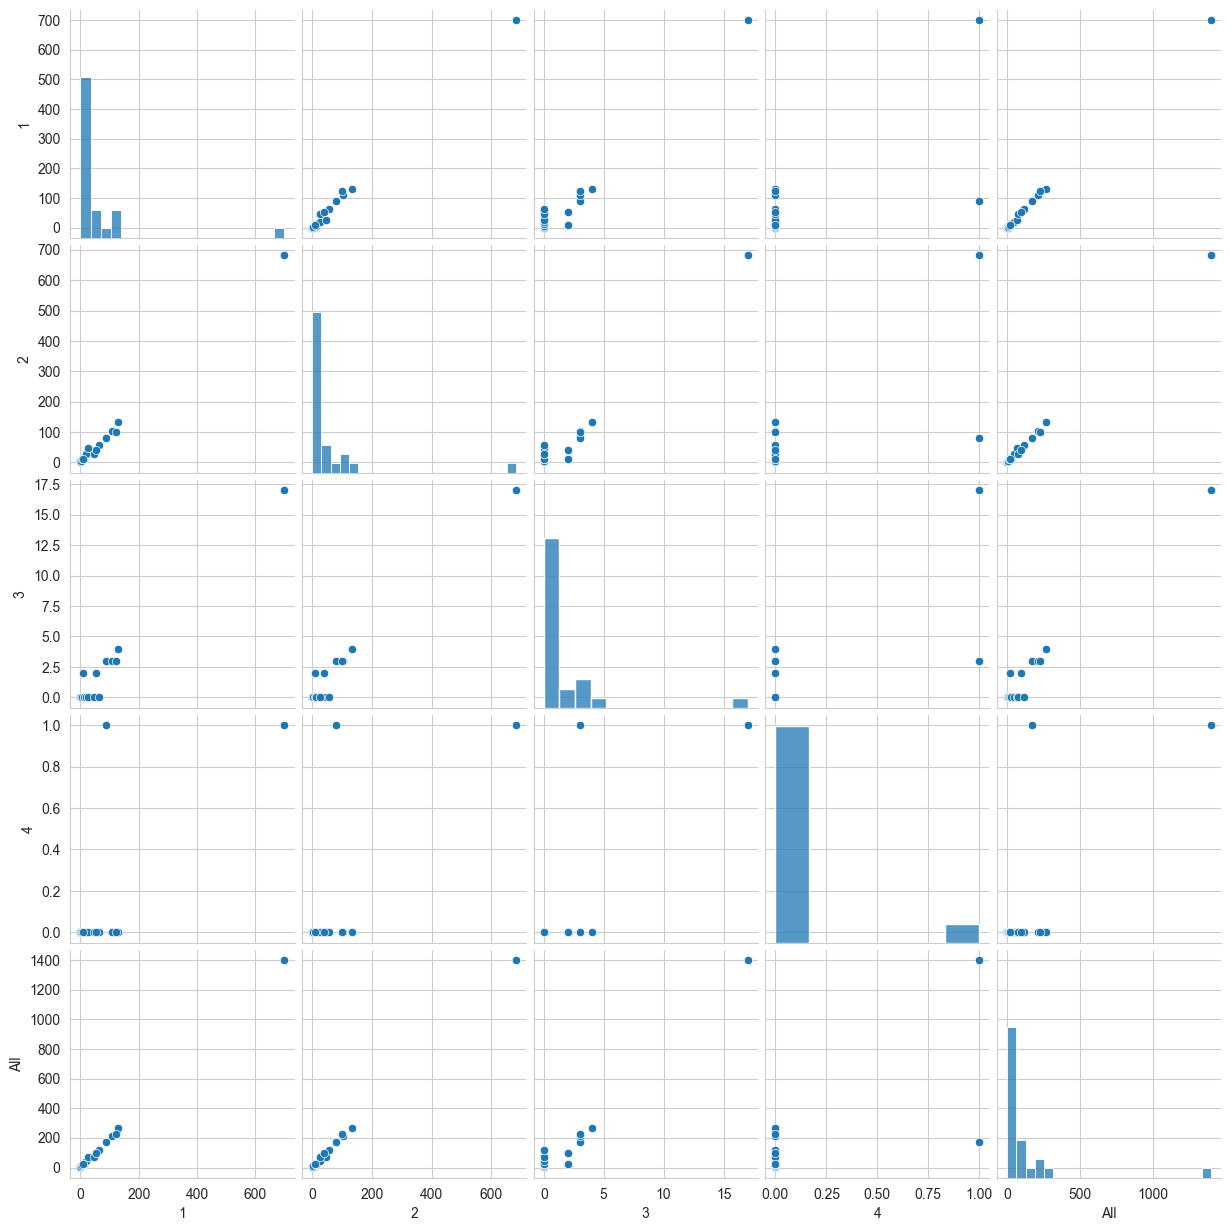

In [24]:
pd.crosstab(df['score'], df['price_range'],margins=True)
sns.pairplot(pd.crosstab(df['score'], df['price_range'],margins=True))

## 5.1 correlation

In [25]:
correlation_matrix = df.loc[:,['position','score','ratings','price_range','lat','lng','include_food']].corr()
print(correlation_matrix)

              position     score   ratings  price_range       lat       lng  \
position      1.000000  0.108353  0.071194     0.107996  0.008286 -0.051696   
score         0.108353  1.000000  0.178798    -0.068419  0.054059 -0.020739   
ratings       0.071194  0.178798  1.000000    -0.003056 -0.031669  0.097251   
price_range   0.107996 -0.068419 -0.003056     1.000000  0.000901 -0.023139   
lat           0.008286  0.054059 -0.031669     0.000901  1.000000 -0.570414   
lng          -0.051696 -0.020739  0.097251    -0.023139 -0.570414  1.000000   
include_food  0.039036 -0.060354 -0.081729    -0.001354  0.022887 -0.080817   

              include_food  
position          0.039036  
score            -0.060354  
ratings          -0.081729  
price_range      -0.001354  
lat               0.022887  
lng              -0.080817  
include_food      1.000000  


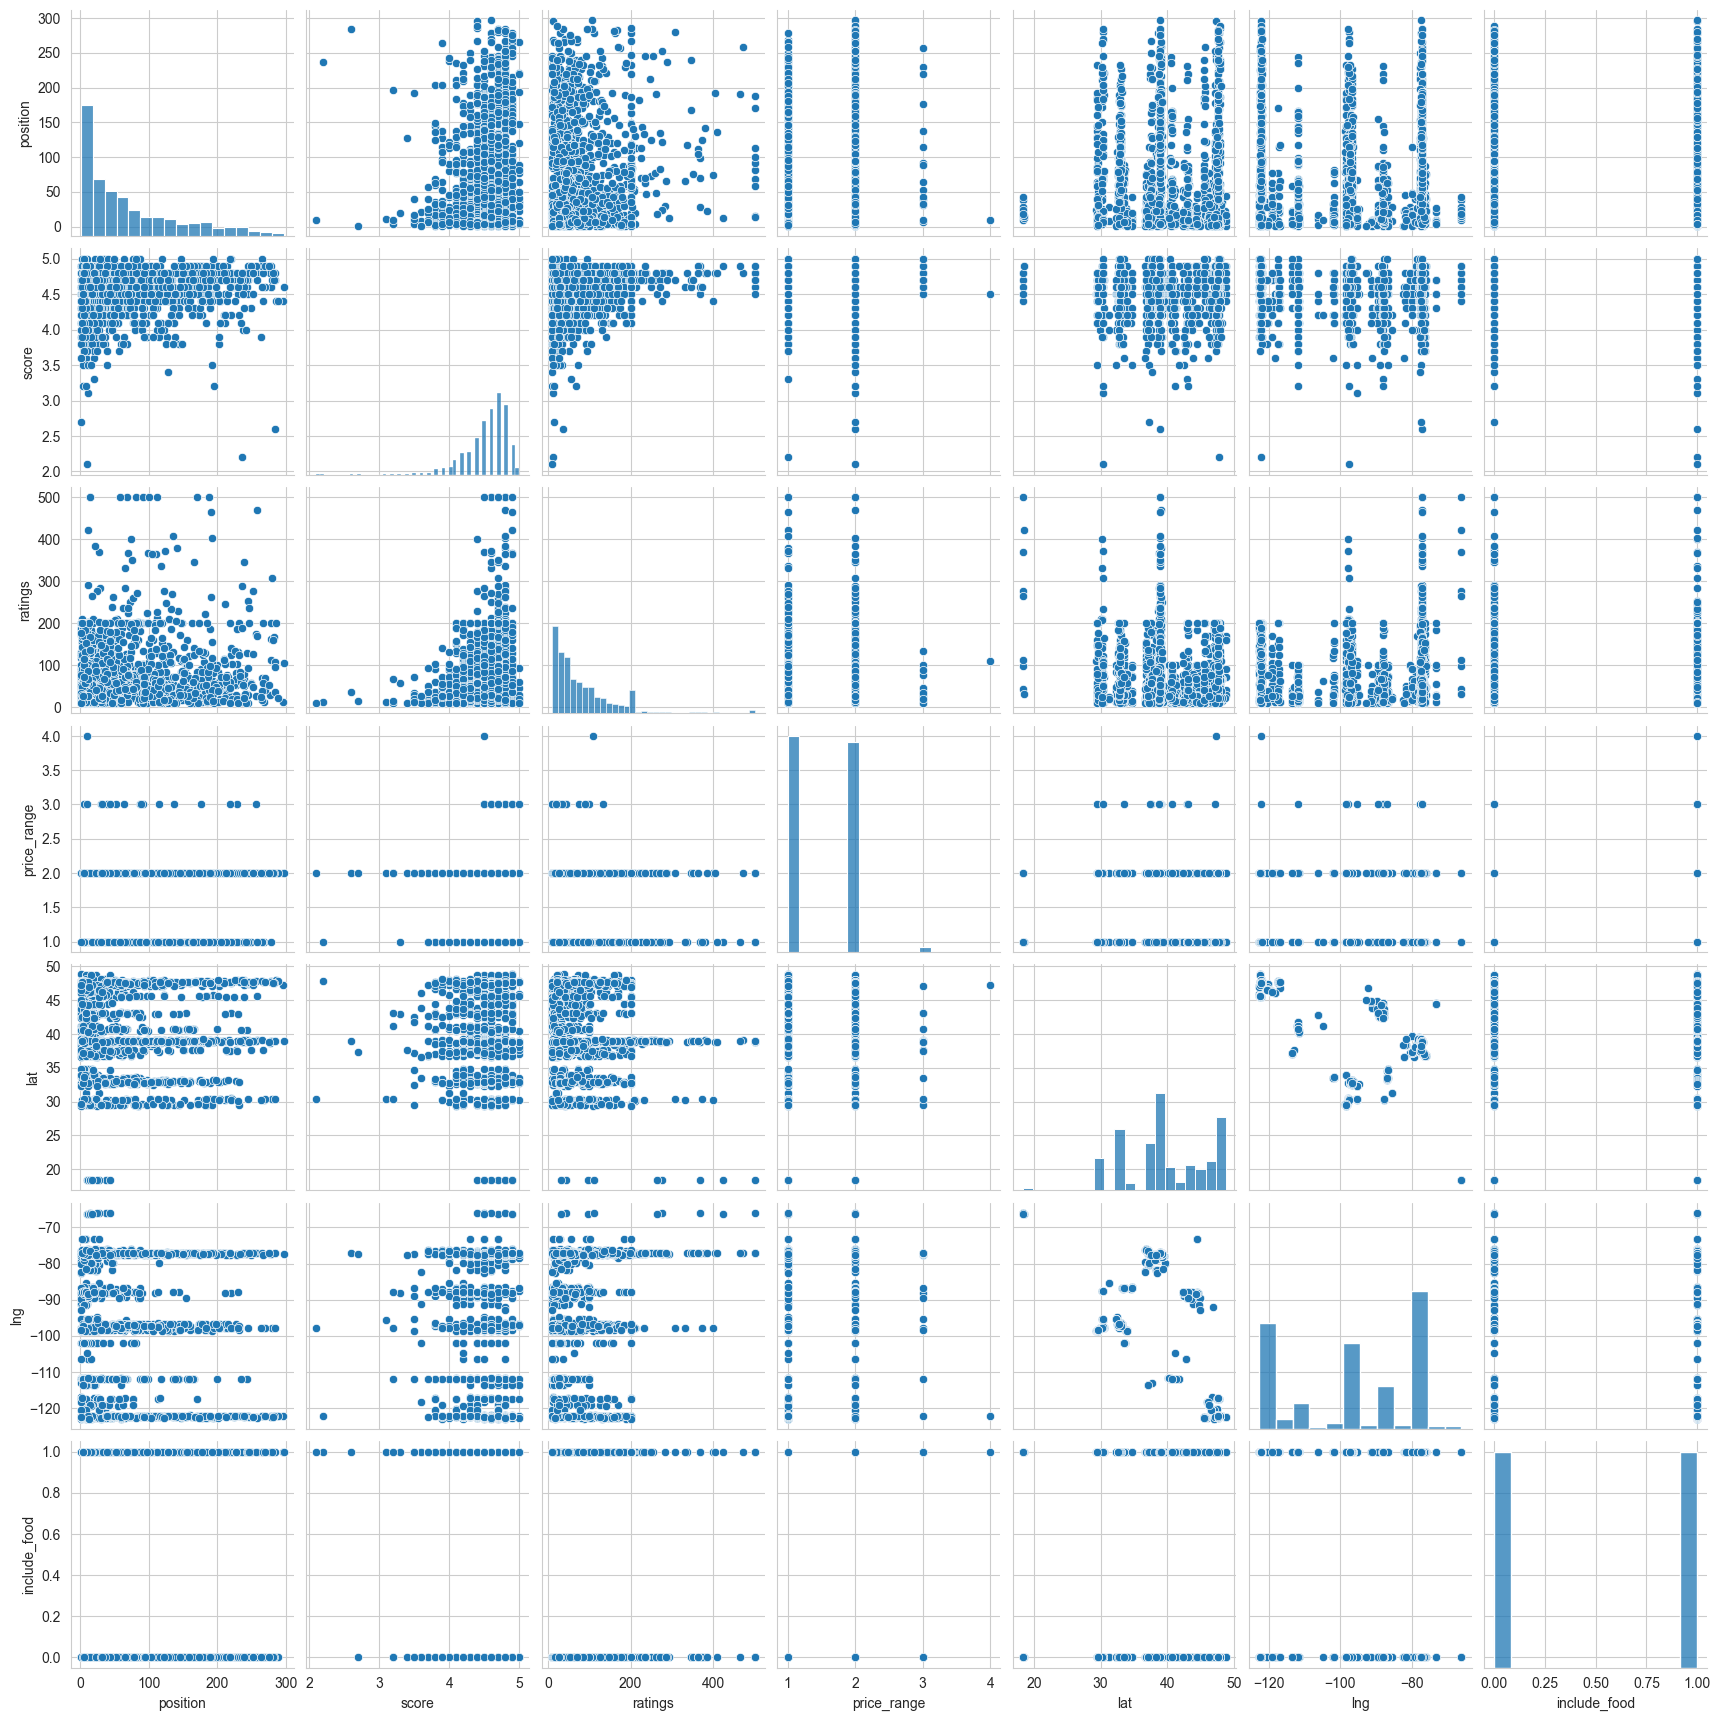

In [26]:
# use pairplot() from seaborn to generate scatter plots to visualise correlation. This is a basic correlogram
sns.pairplot(df.loc[:,['position','score','ratings','price_range','lat','lng','include_food']])
# save the plot in a JPG file named basic_correlogram.jpg, resolution 300
plt.savefig('picture/basic_correlogram.jpg', dpi=300)
plt.show()

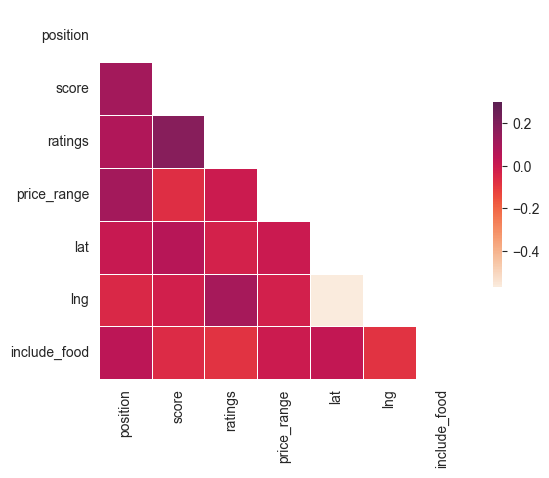

In [27]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Exclude duplicate correlations by masking uper right values;triu(): Upper triangle of an array. #Add diverging colormap
sns.heatmap(correlation_matrix, mask=mask, cmap="rocket_r", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw correlation plot, color map option can be found https://seaborn.pydata.org/tutorial/color_palettes.html
# save the plot in a JPG file named basic_correlogram.jpg, resolution 300
plt.savefig('picture/heatmap_correlogram.jpg', dpi=300)
plt.show()

## 5.2 OLS

In [28]:
df['position_log']=0
df['position_sqe']=0
df['ratings_log']=0
df['ratings_sqe']=0
df['score_log']=0
df['score_sqe']=0
df['position_log']=np.log(df.position)
df['ratings_log']=np.log(df.ratings)
df['position_sqe']=df.position**2
df['ratings_sqe']=df.ratings**2
df['score_log']=np.log(df.score)
df['score_sqe']=df.score**2
df

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,...,lat,lng,include_food,priceGroup,position_log,position_sqe,ratings_log,ratings_sqe,score_log,score_sqe
0,11916,11917,25452,2,7-Eleven 1924 Walnut Ln,4.5,11,"Everyday Essentials, Grocery, Convenience, Hom...",1,"1924 Walnut Ln, Chester, VA, 23836",...,37.330980,-77.323730,1,1,0.693147,4,2.397895,121,1.504077,20.25
1,2786,2787,7992,169,T &amp; T Seafood Restaurant,4.5,15,"Chinese, Asian, Asian Fusion",1,"22511 Highway 99, Edmonds, WA, 98026",...,47.795111,-122.334961,1,1,5.129899,28561,2.708050,225,1.504077,20.25
2,7422,7423,16962,8,MOD Pizza Harbor Hill,4.8,20,"Pizza, Desserts, Salads, American, Healthy, Ve...",1,"4726 Borgen Blvd, Gig Harbor, WA, 98332",...,47.359473,-122.601883,1,1,2.079442,64,2.995732,400,1.568616,23.04
3,6072,6073,14445,7,Taco Bell 6614 N Division St,4.4,147,"Burritos, Fast Food, Mexican",1,"6614 N Division St, Spokane, WA, 99208",...,47.717852,-117.410674,1,1,1.945910,49,4.990433,21609,1.481605,19.36
4,15020,15021,32032,14,Jersey Mike__ Subs 756 South Main Street,4.9,19,"Sandwich, American, Comfort Food",1,"756 South Main Street, Logan, UT, 84321",...,41.718338,-111.834907,1,1,2.639057,196,2.944439,361,1.589235,24.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,8587,8588,19232,276,Rus Uz - Arlington,4.9,53,"Salads, Russian, Healthy",2,"1000 N Randolph St, Arlington, VA, 22201",...,38.882785,-77.109820,0,2,5.620401,76176,3.970292,2809,1.589235,24.01
1396,10944,10945,23619,23,Hooters Fredericksburg,4.7,86,"Bar Food, Wings, American, Chicken, Burgers",2,"10400 Spotsylvania Ave, Fredericksburg, VA, 22408",...,38.243143,-77.497526,0,2,3.135494,529,4.454347,7396,1.547563,22.09
1397,16647,16648,35290,31,Hooters San Pedro Ave &amp; Embassy Oaks,4.6,149,"American, Bar Food, Wings, Chicken, Burgers, A...",2,"13131 San Pedro Ave, San Antonio, TX, 78216",...,29.561603,-98.484268,0,2,3.433987,961,5.003946,22201,1.526056,21.16
1398,3671,3672,9778,32,Sonic 7210 Burden Boulevard,3.9,26,"American, Fast Food, Burgers",2,"7210 Burden Boulevard, Pasco, WA, 99301",...,46.270264,-119.185971,0,2,3.465736,1024,3.258097,676,1.360977,15.21


In [29]:
df['dummy_Position']=df.include_food*df.position
df['dummy_rating']=df.include_food*df.ratings
df

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,...,include_food,priceGroup,position_log,position_sqe,ratings_log,ratings_sqe,score_log,score_sqe,dummy_Position,dummy_rating
0,11916,11917,25452,2,7-Eleven 1924 Walnut Ln,4.5,11,"Everyday Essentials, Grocery, Convenience, Hom...",1,"1924 Walnut Ln, Chester, VA, 23836",...,1,1,0.693147,4,2.397895,121,1.504077,20.25,2,11
1,2786,2787,7992,169,T &amp; T Seafood Restaurant,4.5,15,"Chinese, Asian, Asian Fusion",1,"22511 Highway 99, Edmonds, WA, 98026",...,1,1,5.129899,28561,2.708050,225,1.504077,20.25,169,15
2,7422,7423,16962,8,MOD Pizza Harbor Hill,4.8,20,"Pizza, Desserts, Salads, American, Healthy, Ve...",1,"4726 Borgen Blvd, Gig Harbor, WA, 98332",...,1,1,2.079442,64,2.995732,400,1.568616,23.04,8,20
3,6072,6073,14445,7,Taco Bell 6614 N Division St,4.4,147,"Burritos, Fast Food, Mexican",1,"6614 N Division St, Spokane, WA, 99208",...,1,1,1.945910,49,4.990433,21609,1.481605,19.36,7,147
4,15020,15021,32032,14,Jersey Mike__ Subs 756 South Main Street,4.9,19,"Sandwich, American, Comfort Food",1,"756 South Main Street, Logan, UT, 84321",...,1,1,2.639057,196,2.944439,361,1.589235,24.01,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,8587,8588,19232,276,Rus Uz - Arlington,4.9,53,"Salads, Russian, Healthy",2,"1000 N Randolph St, Arlington, VA, 22201",...,0,2,5.620401,76176,3.970292,2809,1.589235,24.01,0,0
1396,10944,10945,23619,23,Hooters Fredericksburg,4.7,86,"Bar Food, Wings, American, Chicken, Burgers",2,"10400 Spotsylvania Ave, Fredericksburg, VA, 22408",...,0,2,3.135494,529,4.454347,7396,1.547563,22.09,0,0
1397,16647,16648,35290,31,Hooters San Pedro Ave &amp; Embassy Oaks,4.6,149,"American, Bar Food, Wings, Chicken, Burgers, A...",2,"13131 San Pedro Ave, San Antonio, TX, 78216",...,0,2,3.433987,961,5.003946,22201,1.526056,21.16,0,0
1398,3671,3672,9778,32,Sonic 7210 Burden Boulevard,3.9,26,"American, Fast Food, Burgers",2,"7210 Burden Boulevard, Pasco, WA, 99301",...,0,2,3.465736,1024,3.258097,676,1.360977,15.21,0,0


In [30]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = df[['dummy_Position','dummy_rating','include_food']]
Y= df['score']
# add intercept, default option goes without intercept
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.450
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.45e-05
Time:                        18:39:52   Log-Likelihood:                -329.26
No. Observations:                1400   AIC:                             666.5
Df Residuals:                    1396   BIC:                             687.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5587      0.012    393.

#### Summary of OLS:
Adj. R-squared:0.0.051 0.187 would mean our model explains 5.1% of the change in our 'score' variable.

P-value: p-values represent the probability of the coefficient values being 0

Omnibus describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy.

Prob(Omnibus):Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution.

Durbin-Watson is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2.

source:
https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

## 5.3 White test

In [31]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 58.49886939492157, 'Test Statistic p-value': 9.078431212921384e-11, 'F-Statistic': 10.124096954776128, 'F-Test p-value': 5.5749418440114384e-11}


## 5.4 Durbin-Watson

In [32]:
##Independence of residuals: residuals should be independent from the others.
##We need to compute those residuals by using the previous results
##Let us use the gradient descent's alpha and beta...
from statsmodels.stats.stattools import durbin_watson

Residuals= model.resid

#compare Durbin-Watson statistic with 2. If Durbin-Watson statistic is close to 2, then accept the null hypothesis that residuals are independent.
print('Durbin-Watson statistic is ', durbin_watson(Residuals))

Durbin-Watson statistic is  2.034577362860867


## 5.5 residual test

p-value of Chi-squared goodness of fit test is 4.632319103336946e-119
null hypothesis for group online should be reject, as p-value < 5% 


Text(0.5, 0, 'Value of Residual')

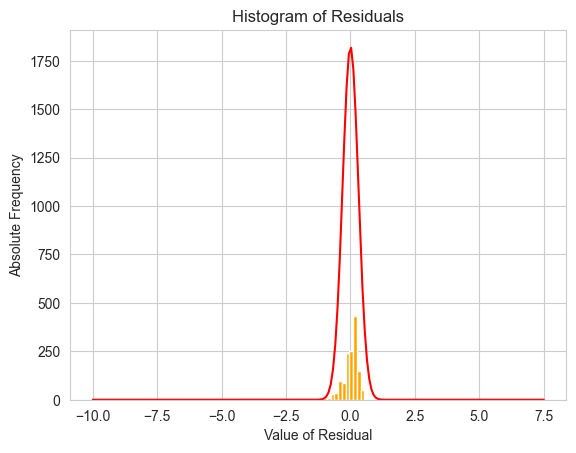

In [33]:
##Normality of residuals: residuals are normally distributed

import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#Perform the Chi-squared goodness of fit test to check the normality assumption under type I error 5%.

#We know that a random variable that follows normal distribution is continuous.

#For Chi-squared goodness of fit test, the test statistic is summing the squared difference between the observed frequency and the expected frequency of an outcome. #Continuous normal distribution means a infinite number of outcomes.

#Hence, we should discretise the continuous normal distribution by using bins/sub-regions.

mean_Residuals=np.mean(Residuals)
var_Residuals=np.var(Residuals,ddof=1) #ddof is delta degree of freedom, ddof=1: using sample mean formula mean_G[0,0]= np.mean(Group1) var_G[0,0]= np.var(Group1,ddof=1)

#Cutoffs for those bins can be found via the inverse function of CDF #21 bins require 20 cutoffs.

Bin_Cutoff=np.zeros(20)

for i in range(20):
    Bin_Cutoff[i]=sts.norm.ppf((i+1)/21,loc=mean_Residuals,scale=np.sqrt(var_Residuals)) #all bins have equal probabilities, the sum is 1.

Expected_Relative_Freq=1/21*np.ones(21)

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin
Observed_Absolute_Freq=np.zeros(21)

Observed_Absolute_Freq[0]=len(np.where(Residuals <= Bin_Cutoff[0])[0])
for i in range(1,20):
    Observed_Absolute_Freq[i]=len(np.where(Residuals <= Bin_Cutoff[i])[0])-np.sum(Observed_Absolute_Freq[0:i])

Observed_Absolute_Freq[20]=len(Residuals)-np.sum(Observed_Absolute_Freq[0:21])
Expected_Absolute_Freq=Expected_Relative_Freq*len(Residuals)
print('p-value of Chi-squared goodness of fit test is', sts.chisquare(Observed_Absolute_Freq,Expected_Absolute_Freq,ddof=2)[1])
#print('null hypothesis for group online should be retained, as p-value> 5% ')
print('null hypothesis for group online should be reject, as p-value < 5% ')

#Alternatively, generate a histogram to check this, the histogram can be integrated with a PDF curve
plt.hist(Residuals, bins= 20, color='Orange')
pltx=np.linspace(-10,7.5,200)
plt.plot(pltx,len(Residuals)*sts.norm.pdf(pltx,loc=mean_Residuals,scale=np.sqrt(var_Residuals)),color='red')
plt.title('Histogram of Residuals')
plt.ylabel('Absolute Frequency')
plt.xlabel('Value of Residual')

LeveneResult(statistic=0.8844822060815246, pvalue=0.44846732110914067)
LeveneResult(statistic=nan, pvalue=nan)


/Users/zhangjiahao/Desktop/pycharm/venv39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhangjiahao/Desktop/pycharm/venv39/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


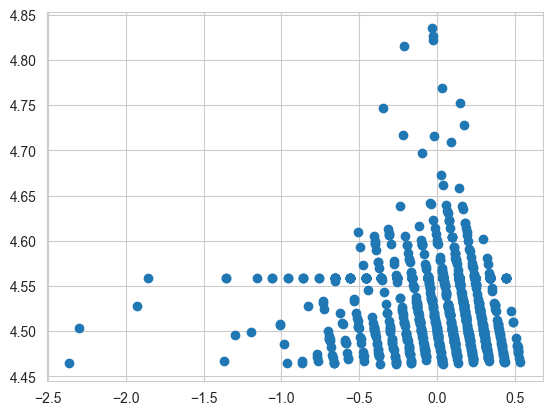

In [34]:
#Equal variance: residuals for all values of independent variable 𝑋 should have equal variances.


#We can use scatter plot fitted values v.s. residuals
Y_fit = model.predict(X)
plt.scatter(Residuals,Y_fit)


#Use Levene's test to verify this
#Residuals are distributed in a one-dimension interval. Divide the interval into several sub-interval
#Find the upper and lower limit for the range of residuals.
#Bin approximation again....
#We divide the whole interval between Upper_limit and Lower_limit into 4 sub-intervals
#We want to see if samples in those sub-interval have equal variance by using levene test.

Upper_limit=max(Residuals)
Lower_limit=min(Residuals)
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals[np.where(Residuals <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals[np.where((Residuals > Range_Cutoff[0]) & (Residuals <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals[np.where((Residuals > Range_Cutoff[1]) & (Residuals <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals[np.where((Residuals > Range_Cutoff[2]) & (Residuals <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))


##If we get remove outliers and set the lower limit to be -6, as from -6, there are sample points, then the null hypothesis will be accepted.
Upper_limit=max(Residuals)
Lower_limit=-6
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals[np.where(Residuals <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals[np.where((Residuals > Range_Cutoff[0]) & (Residuals <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals[np.where((Residuals > Range_Cutoff[1]) & (Residuals <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals[np.where((Residuals > Range_Cutoff[2]) & (Residuals <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))

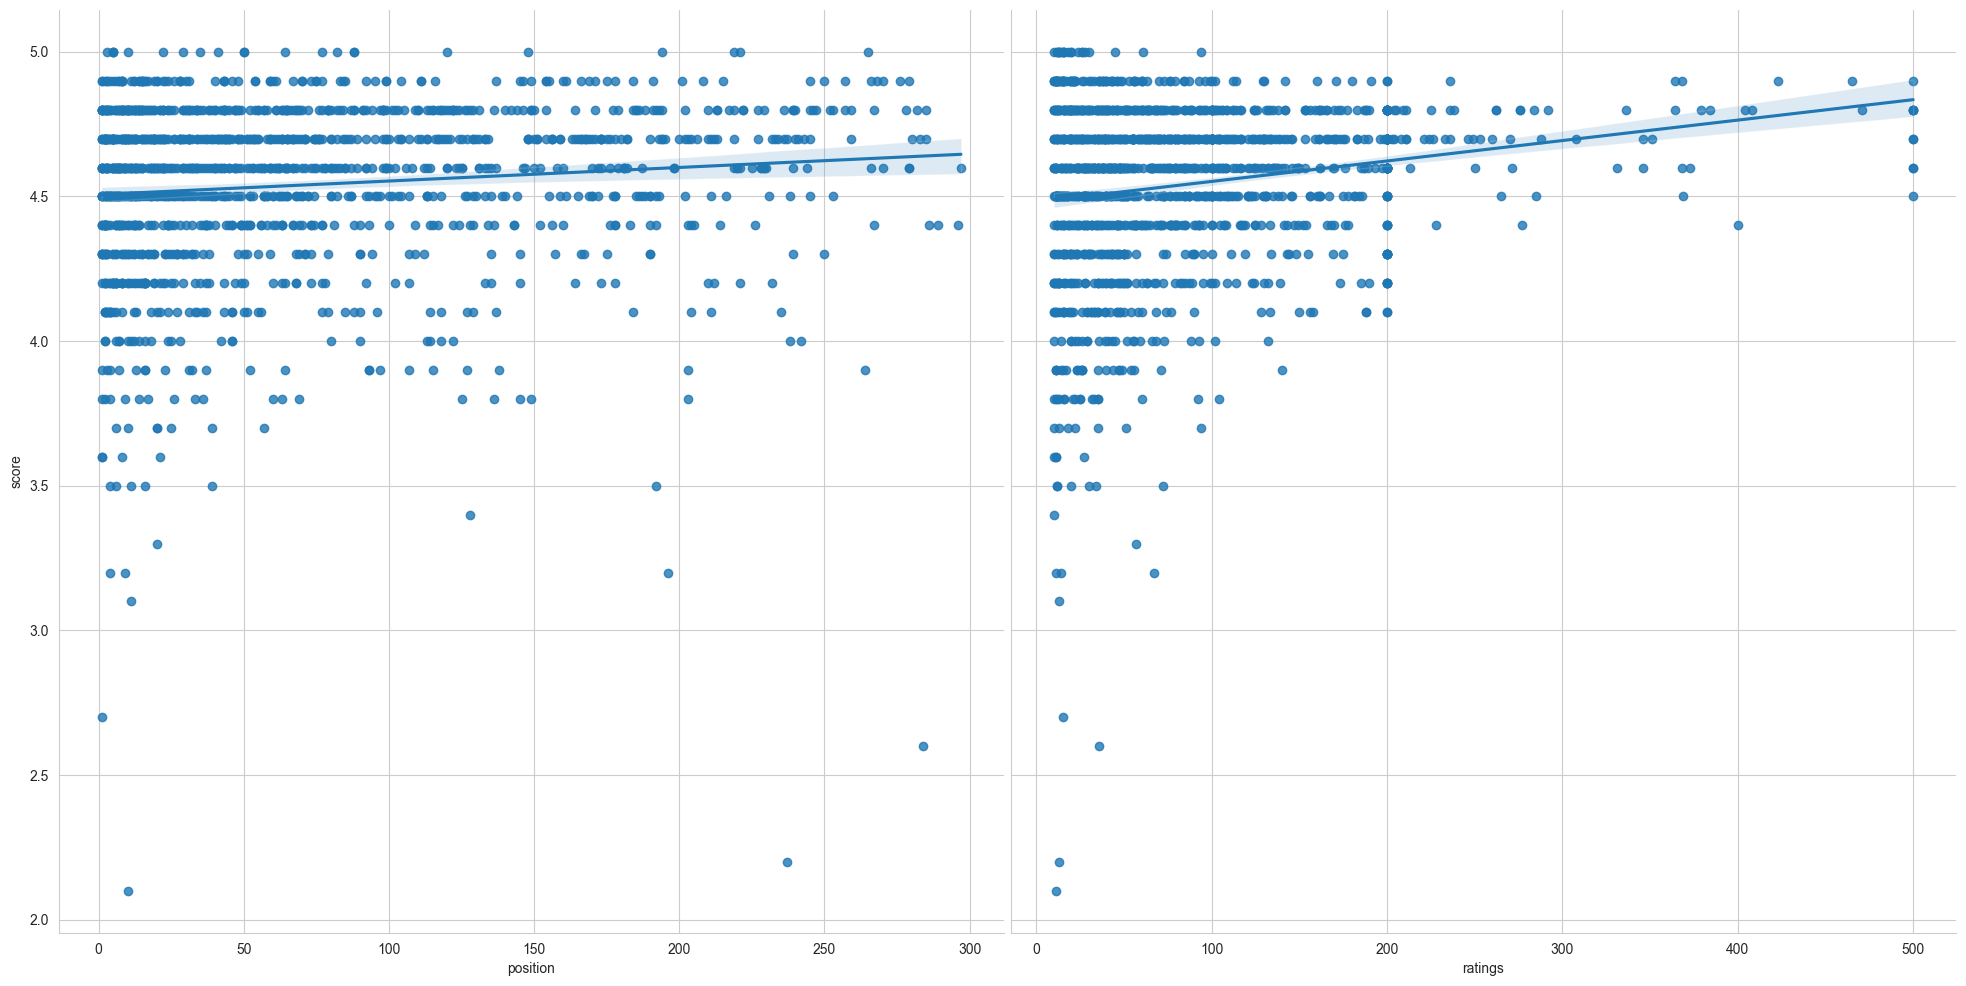

In [35]:
import matplotlib.pyplot as plt #画图的基础包
import seaborn as sns #画图的高级包
sns.pairplot(df, x_vars=['position','ratings'], y_vars='score', kind='reg', height=10, aspect=1)
plt.show()

## 5.6 forward selected

In [36]:
import statsmodels.formula.api as smf
import pandas as pd

def forward_selected(data, response):
    """前向逐步回归算法，源代码来自https://planspace.org/20150423-forward_selection_with_statsmodels/
    使用Adjusted R-squared来评判新加的参数是否提高回归中的统计显著性
    Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()

    return model

    #将sl（年收入）设为目标变量

model = forward_selected(df[['position','ratings','price_range','lat','lng','include_food','score']], 'score')

    #打印出最后的回归模型
    # sl ~ rk + yr + 1
print(model.model.formula)
print(model.params)

print(model.rsquared_adj)

score ~ ratings + position + price_range + lat + include_food + 1
Intercept       4.414148
ratings         0.000666
position        0.000461
price_range    -0.046559
lat             0.003128
include_food   -0.032252
dtype: float64
0.0501119840027513


## 5.7 VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif_val= [variance_inflation_factor(X.values, i)    for    i    in    range(X.shape[1])]
print(vif_val)

[2.0, 1.543947368867346, 1.5756298213349096, 2.0461815398568866]


# 6 logist regression

In [39]:
import statsmodels.api as sm
from sklearn.datasets import make_blobs

X = df[['position','ratings','price_range']]
#['position','ratings','price_range','lat','lng','include_food']
Y= df['include_food']

logit_model = sm.Logit(Y, sm.add_constant(X)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.688732
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           include_food   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                0.006369
Time:                        18:39:53   Log-Likelihood:                -964.23
converged:                       True   LL-Null:                       -970.41
Covariance Type:            nonrobust   LLR p-value:                  0.006241
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1294      0.176      0.734      0.463      -0.216       0.475
position        0.0013    

# 7. normalize

In [40]:
# copy the data
df_max_scaled = df.loc[:,['position','ratings','lat']].copy()

# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)

,position,ratings,lat
0,0.006734,0.022,0.765008
1,0.569024,0.030,0.979445
2,0.026936,0.040,0.970518
3,0.023569,0.294,0.977862
4,0.047138,0.038,0.854916
...,...,...,...
1395,0.929293,0.106,0.796809
1396,0.077441,0.172,0.783701
1397,0.104377,0.298,0.605794
1398,0.107744,0.052,0.948197


In [41]:
df_reg=pd.concat([df_max_scaled,df.loc[:,['score','include_food','price_range']]],axis=1)
df_reg

,position,ratings,lat,score,include_food,price_range
0,0.006734,0.022,0.765008,4.5,1,1
1,0.569024,0.030,0.979445,4.5,1,1
2,0.026936,0.040,0.970518,4.8,1,1
3,0.023569,0.294,0.977862,4.4,1,1
4,0.047138,0.038,0.854916,4.9,1,1
...,...,...,...,...,...,...
1395,0.929293,0.106,0.796809,4.9,0,2
1396,0.077441,0.172,0.783701,4.7,0,2
1397,0.104377,0.298,0.605794,4.6,0,2
1398,0.107744,0.052,0.948197,3.9,0,2


In [42]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = df_reg[['position','ratings']]
Y= df_reg['score']
# add intercept, default option goes without intercept
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     29.98
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.78e-13
Time:                        18:39:53   Log-Likelihood:                -312.43
No. Observations:                1400   AIC:                             630.9
Df Residuals:                    1397   BIC:                             646.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4539      0.014    318.288      0.0

In [43]:
import statsmodels.api as sm
from sklearn.datasets import make_blobs

X = df_reg[['position','ratings','price_range']]
#['position','ratings','price_range','lat','lng','include_food']
Y= df_reg['include_food']

logit_model = sm.Logit(Y, sm.add_constant(X)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.688732
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           include_food   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                0.006369
Time:                        18:39:53   Log-Likelihood:                -964.23
converged:                       True   LL-Null:                       -970.41
Covariance Type:            nonrobust   LLR p-value:                  0.006241
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1294      0.176      0.734      0.463      -0.216       0.475
position        0.3839    

# 8.split group

## 8.1 infood

In [44]:
df_infood=df[df.include_food == 1]
df_infood

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,...,include_food,priceGroup,position_log,position_sqe,ratings_log,ratings_sqe,score_log,score_sqe,dummy_Position,dummy_rating
0,11916,11917,25452,2,7-Eleven 1924 Walnut Ln,4.5,11,"Everyday Essentials, Grocery, Convenience, Hom...",1,"1924 Walnut Ln, Chester, VA, 23836",...,1,1,0.693147,4,2.397895,121,1.504077,20.25,2,11
1,2786,2787,7992,169,T &amp; T Seafood Restaurant,4.5,15,"Chinese, Asian, Asian Fusion",1,"22511 Highway 99, Edmonds, WA, 98026",...,1,1,5.129899,28561,2.708050,225,1.504077,20.25,169,15
2,7422,7423,16962,8,MOD Pizza Harbor Hill,4.8,20,"Pizza, Desserts, Salads, American, Healthy, Ve...",1,"4726 Borgen Blvd, Gig Harbor, WA, 98332",...,1,1,2.079442,64,2.995732,400,1.568616,23.04,8,20
3,6072,6073,14445,7,Taco Bell 6614 N Division St,4.4,147,"Burritos, Fast Food, Mexican",1,"6614 N Division St, Spokane, WA, 99208",...,1,1,1.945910,49,4.990433,21609,1.481605,19.36,7,147
4,15020,15021,32032,14,Jersey Mike__ Subs 756 South Main Street,4.9,19,"Sandwich, American, Comfort Food",1,"756 South Main Street, Logan, UT, 84321",...,1,1,2.639057,196,2.944439,361,1.589235,24.01,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,16270,16271,34626,98,Se_±or Fish Seafood Bar,4.6,10,"Seafood, Mexican, Tacos, South American, Healthy",2,"1915 Broadway, San Antonio, TX, 78215",...,1,2,4.584967,9604,2.302585,100,1.526056,21.16,98,10
696,17957,17958,38094,52,Macaroni Grill - University,4.4,125,Italian,2,"1505 S University Dr, Fort Worth, TX, 76107",...,1,2,3.951244,2704,4.828314,15625,1.481605,19.36,52,125
697,18134,18135,38485,129,Red Lobster 1175 N. Burleson Blvd.,4.5,48,"Seafood, American, Family Meals",2,"1175 N., Burleson, TX, 76028",...,1,2,4.859812,16641,3.871201,2304,1.504077,20.25,129,48
698,733,734,1821,4,Mulligans Irish Pub and Grill,4.5,112,"European, Burgers, Pub, Family Friendly, Pizza...",2,"8933 S 27th St, Franklin, WI, 53132",...,1,2,1.386294,16,4.718499,12544,1.504077,20.25,4,112


In [45]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = df_infood[['position','ratings']]
Y= df_infood['score']
# add intercept, default option goes without intercept
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     8.643
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000196
Time:                        18:39:53   Log-Likelihood:                -218.17
No. Observations:                 700   AIC:                             442.3
Df Residuals:                     697   BIC:                             456.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4559      0.022    202.434      0.0

In [46]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

white_test = het_white(model1.resid,  model1.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 36.23160125440108, 'Test Statistic p-value': 8.536868608506517e-07, 'F-Statistic': 7.576356849188151, 'F-Test p-value': 6.091666734472982e-07}


In [47]:
##Independence of residuals: residuals should be independent from the others.
##We need to compute those residuals by using the previous results
##Let us use the gradient descent's alpha and beta...
from statsmodels.stats.stattools import durbin_watson

Residuals1= model1.resid

#compare Durbin-Watson statistic with 2. If Durbin-Watson statistic is close to 2, then accept the null hypothesis that residuals are independent.
print('Durbin-Watson statistic is ', durbin_watson(Residuals1))

Durbin-Watson statistic is  2.0109099901336247


p-value of Chi-squared goodness of fit test is 3.425048431358295e-24
null hypothesis for group online should be reject, as p-value < 5% 


Text(0.5, 0, 'Value of Residual')

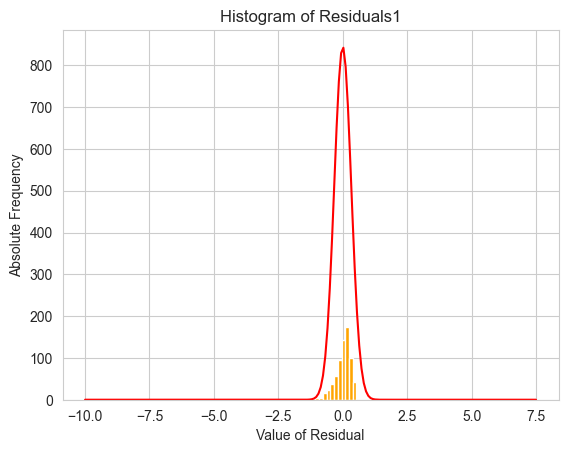

In [48]:
##Normality of residuals: residuals are normally distributed

import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#Perform the Chi-squared goodness of fit test to check the normality assumption under type I error 5%.

#We know that a random variable that follows normal distribution is continuous.

#For Chi-squared goodness of fit test, the test statistic is summing the squared difference between the observed frequency and the expected frequency of an outcome. #Continuous normal distribution means a infinite number of outcomes.

#Hence, we should discretise the continuous normal distribution by using bins/sub-regions.

mean_Residuals1=np.mean(Residuals1)
var_Residuals1=np.var(Residuals1,ddof=1) #ddof is delta degree of freedom, ddof=1: using sample mean formula mean_G[0,0]= np.mean(Group1) var_G[0,0]= np.var(Group1,ddof=1)

#Cutoffs for those bins can be found via the inverse function of CDF #21 bins require 20 cutoffs.

Bin_Cutoff=np.zeros(20)

for i in range(20):
    Bin_Cutoff[i]=sts.norm.ppf((i+1)/21,loc=mean_Residuals1,scale=np.sqrt(var_Residuals1)) #all bins have equal probabilities, the sum is 1.

Expected_Relative_Freq=1/21*np.ones(21)

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin
Observed_Absolute_Freq=np.zeros(21)

Observed_Absolute_Freq[0]=len(np.where(Residuals1 <= Bin_Cutoff[0])[0])
for i in range(1,20):
    Observed_Absolute_Freq[i]=len(np.where(Residuals1 <= Bin_Cutoff[i])[0])-np.sum(Observed_Absolute_Freq[0:i])

Observed_Absolute_Freq[20]=len(Residuals1)-np.sum(Observed_Absolute_Freq[0:21])
Expected_Absolute_Freq=Expected_Relative_Freq*len(Residuals1)
print('p-value of Chi-squared goodness of fit test is', sts.chisquare(Observed_Absolute_Freq,Expected_Absolute_Freq,ddof=2)[1])
#print('null hypothesis for group online should be retained, as p-value> 5% ')
print('null hypothesis for group online should be reject, as p-value < 5% ')

#Alternatively, generate a histogram to check this, the histogram can be integrated with a PDF curve
plt.hist(Residuals1, bins= 20, color='Orange')
pltx=np.linspace(-10,7.5,200)
plt.plot(pltx,len(Residuals1)*sts.norm.pdf(pltx,loc=mean_Residuals1,scale=np.sqrt(var_Residuals1)),color='red')
plt.title('Histogram of Residuals1')
plt.ylabel('Absolute Frequency')
plt.xlabel('Value of Residual')

LeveneResult(statistic=1.4606115090477503, pvalue=0.22406760738576706)
LeveneResult(statistic=nan, pvalue=nan)


/Users/zhangjiahao/Desktop/pycharm/venv39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhangjiahao/Desktop/pycharm/venv39/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


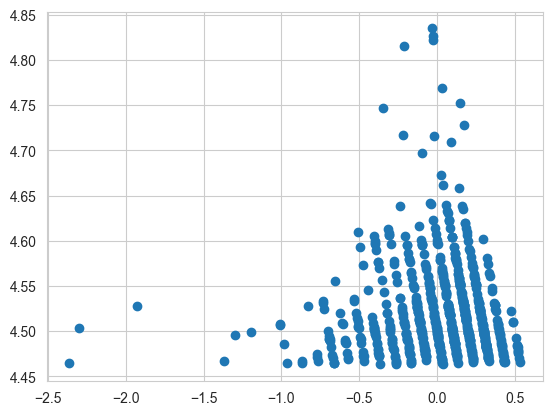

In [49]:
#Equal variance: residuals for all values of independent variable 𝑋 should have equal variances.


#We can use scatter plot fitted values v.s. residuals
Y_fit = model1.predict(X)
plt.scatter(Residuals1,Y_fit)


#Use Levene's test to verify this
#Residuals are distributed in a one-dimension interval. Divide the interval into several sub-interval
#Find the upper and lower limit for the range of residuals.
#Bin approximation again....
#We divide the whole interval between Upper_limit and Lower_limit into 4 sub-intervals
#We want to see if samples in those sub-interval have equal variance by using levene test.

Upper_limit=max(Residuals1)
Lower_limit=min(Residuals1)
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals1[np.where(Residuals1 <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals1[np.where((Residuals1 > Range_Cutoff[0]) & (Residuals1 <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals1[np.where((Residuals1 > Range_Cutoff[1]) & (Residuals1 <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals1[np.where((Residuals1 > Range_Cutoff[2]) & (Residuals1 <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))


##If we get remove outliers and set the lower limit to be -6, as from -6, there are sample points, then the null hypothesis will be accepted.
Upper_limit=max(Residuals1)
Lower_limit=-6
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals1[np.where(Residuals1 <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals1[np.where((Residuals1 > Range_Cutoff[0]) & (Residuals1 <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals1[np.where((Residuals1 > Range_Cutoff[1]) & (Residuals1 <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals1[np.where((Residuals1 > Range_Cutoff[2]) & (Residuals1 <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))

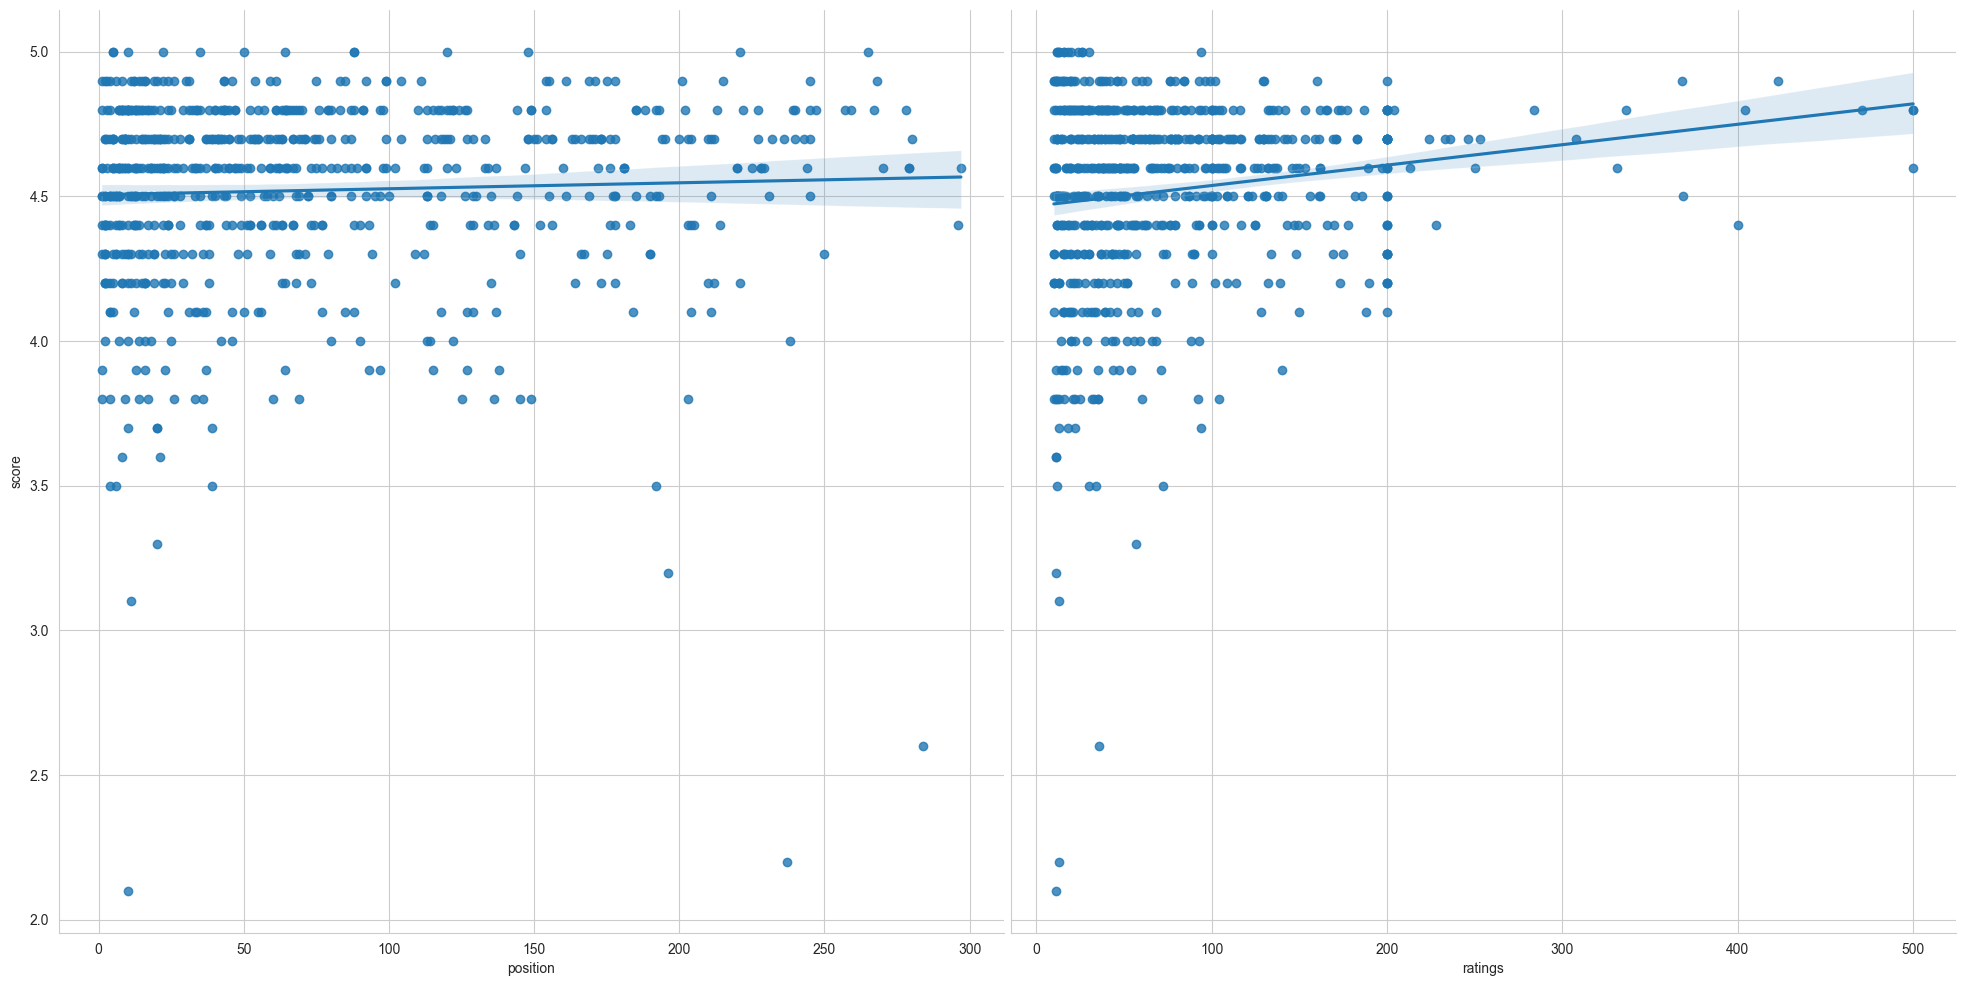

In [50]:
import matplotlib.pyplot as plt #画图的基础包
import seaborn as sns #画图的高级包
sns.pairplot(df_infood, x_vars=['position','ratings'], y_vars='score', kind='reg', height=10, aspect=1)
plt.show()

## 8.2 exfood

In [51]:
df_exfood=df[df.include_food == 0]
df_exfood

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,...,include_food,priceGroup,position_log,position_sqe,ratings_log,ratings_sqe,score_log,score_sqe,dummy_Position,dummy_rating
700,15371,15372,32767,15,McDonald's Trujillo Alto,4.6,500,Burgers,1,"Expreso Manuel Rivera Morales, Trujillo Alto, ...",...,0,1,2.708050,225,6.214608,250000,1.526056,21.16,0,0
701,2456,2457,7185,3,Popeye's 5608 Hammonds Mill Road,4.6,14,"American, Chicken, Family Meals, Fried Chicken...",1,"5608 Hammonds Mill Road, Martinsburg, WV, 25404",...,0,1,1.098612,9,2.639057,196,1.526056,21.16,0,0
702,14228,14229,30289,3,McDonald's_® 1866 NORTH 2000 WEST,4.5,73,"American, Burgers, Fast Food",1,"1866 NORTH 2000 WEST, CLINTON, UT, 84015",...,0,1,1.098612,9,4.290459,5329,1.504077,20.25,0,0
703,15521,15522,33059,216,Chopsticks Asian Cafe,4.5,73,"Asian, Chinese",1,"1717 W University Dr, McKinney, TX, 75069",...,0,1,5.375278,46656,4.290459,5329,1.504077,20.25,0,0
704,18715,18716,39546,203,Wayside,3.9,40,"Burgers, American, Sandwiches, Breakfast and B...",1,"606 Maiden Ln, Austin, TX, 78705",...,0,1,5.313206,41209,3.688879,1600,1.360977,15.21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,8587,8588,19232,276,Rus Uz - Arlington,4.9,53,"Salads, Russian, Healthy",2,"1000 N Randolph St, Arlington, VA, 22201",...,0,2,5.620401,76176,3.970292,2809,1.589235,24.01,0,0
1396,10944,10945,23619,23,Hooters Fredericksburg,4.7,86,"Bar Food, Wings, American, Chicken, Burgers",2,"10400 Spotsylvania Ave, Fredericksburg, VA, 22408",...,0,2,3.135494,529,4.454347,7396,1.547563,22.09,0,0
1397,16647,16648,35290,31,Hooters San Pedro Ave &amp; Embassy Oaks,4.6,149,"American, Bar Food, Wings, Chicken, Burgers, A...",2,"13131 San Pedro Ave, San Antonio, TX, 78216",...,0,2,3.433987,961,5.003946,22201,1.526056,21.16,0,0
1398,3671,3672,9778,32,Sonic 7210 Burden Boulevard,3.9,26,"American, Fast Food, Burgers",2,"7210 Burden Boulevard, Pasco, WA, 99301",...,0,2,3.465736,1024,3.258097,676,1.360977,15.21,0,0


In [52]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = df_exfood[['position','ratings']]
Y= df_exfood['score']
# add intercept, default option goes without intercept
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     27.08
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           4.74e-12
Time:                        18:39:54   Log-Likelihood:                -75.207
No. Observations:                 700   AIC:                             156.4
Df Residuals:                     697   BIC:                             170.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4549      0.017    255.860      0.0

In [53]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

white_test = het_white(model2.resid,  model2.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 42.794548149929824, 'Test Statistic p-value': 4.0668534764074695e-08, 'F-Statistic': 9.038091918576082, 'F-Test p-value': 2.456601962954588e-08}


In [54]:
##Independence of residuals: residuals should be independent from the others.
##We need to compute those residuals by using the previous results
##Let us use the gradient descent's alpha and beta...
from statsmodels.stats.stattools import durbin_watson

Residuals2= model2.resid

#compare Durbin-Watson statistic with 2. If Durbin-Watson statistic is close to 2, then accept the null hypothesis that residuals are independent.
print('Durbin-Watson statistic is ', durbin_watson(Residuals2))

Durbin-Watson statistic is  2.10963644130727


p-value of Chi-squared goodness of fit test is 9.894096450347473e-13
null hypothesis for group online should be reject, as p-value < 5% 


Text(0.5, 0, 'Value of Residual')

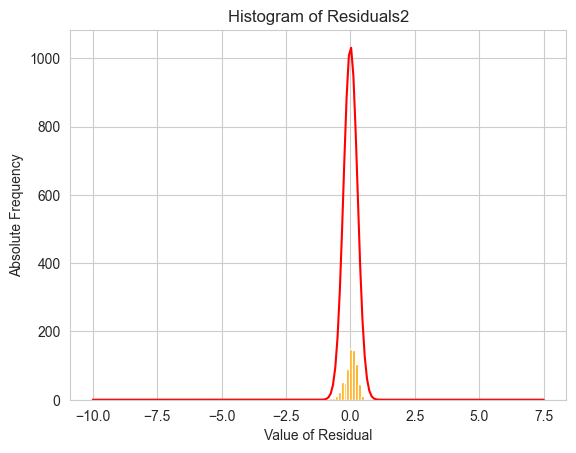

In [55]:
##Normality of residuals: residuals are normally distributed

import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#Perform the Chi-squared goodness of fit test to check the normality assumption under type I error 5%.

#We know that a random variable that follows normal distribution is continuous.

#For Chi-squared goodness of fit test, the test statistic is summing the squared difference between the observed frequency and the expected frequency of an outcome. #Continuous normal distribution means a infinite number of outcomes.

#Hence, we should discretise the continuous normal distribution by using bins/sub-regions.

mean_Residuals2=np.mean(Residuals2)
var_Residuals2=np.var(Residuals2,ddof=1) #ddof is delta degree of freedom, ddof=1: using sample mean formula mean_G[0,0]= np.mean(Group1) var_G[0,0]= np.var(Group1,ddof=1)

#Cutoffs for those bins can be found via the inverse function of CDF #21 bins require 20 cutoffs.

Bin_Cutoff=np.zeros(20)

for i in range(20):
    Bin_Cutoff[i]=sts.norm.ppf((i+1)/21,loc=mean_Residuals2,scale=np.sqrt(var_Residuals2)) #all bins have equal probabilities, the sum is 1.

Expected_Relative_Freq=1/21*np.ones(21)

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin
Observed_Absolute_Freq=np.zeros(21)

Observed_Absolute_Freq[0]=len(np.where(Residuals2 <= Bin_Cutoff[0])[0])
for i in range(1,20):
    Observed_Absolute_Freq[i]=len(np.where(Residuals2 <= Bin_Cutoff[i])[0])-np.sum(Observed_Absolute_Freq[0:i])

Observed_Absolute_Freq[20]=len(Residuals2)-np.sum(Observed_Absolute_Freq[0:21])
Expected_Absolute_Freq=Expected_Relative_Freq*len(Residuals2)
print('p-value of Chi-squared goodness of fit test is', sts.chisquare(Observed_Absolute_Freq,Expected_Absolute_Freq,ddof=2)[1])
#print('null hypothesis for group online should be retained, as p-value> 5% ')
print('null hypothesis for group online should be reject, as p-value < 5% ')

#Alternatively, generate a histogram to check this, the histogram can be integrated with a PDF curve
plt.hist(Residuals2, bins= 20, color='Orange')
pltx=np.linspace(-10,7.5,200)
plt.plot(pltx,len(Residuals2)*sts.norm.pdf(pltx,loc=mean_Residuals2,scale=np.sqrt(var_Residuals2)),color='red')
plt.title('Histogram of Residuals2')
plt.ylabel('Absolute Frequency')
plt.xlabel('Value of Residual')

KeyError: "None of [Int64Index([378], dtype='int64')] are in the [index]"

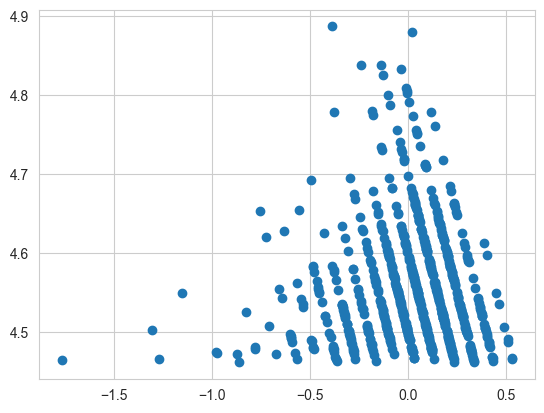

In [56]:
#Equal variance: residuals for all values of independent variable 𝑋 should have equal variances.


#We can use scatter plot fitted values v.s. residuals
Y_fit = model2.predict(X)
plt.scatter(Residuals2,Y_fit)


#Use Levene's test to verify this
#Residuals are distributed in a one-dimension interval. Divide the interval into several sub-interval
#Find the upper and lower limit for the range of residuals.
#Bin approximation again....
#We divide the whole interval between Upper_limit and Lower_limit into 4 sub-intervals
#We want to see if samples in those sub-interval have equal variance by using levene test.

Upper_limit=max(Residuals2)
Lower_limit=min(Residuals2)
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals2[np.where(Residuals2 <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals2[np.where((Residuals2 > Range_Cutoff[0]) & (Residuals2 <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals2[np.where((Residuals2 > Range_Cutoff[1]) & (Residuals2 <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals2[np.where((Residuals2 > Range_Cutoff[2]) & (Residuals2 <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))


##If we get remove outliers and set the lower limit to be -6, as from -6, there are sample points, then the null hypothesis will be accepted.
Upper_limit=max(Residuals2)
Lower_limit=-6
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals2[np.where(Residuals2 <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals2[np.where((Residuals2 > Range_Cutoff[0]) & (Residuals2 <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals2[np.where((Residuals2 > Range_Cutoff[1]) & (Residuals2 <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals2[np.where((Residuals2 > Range_Cutoff[2]) & (Residuals2 <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))

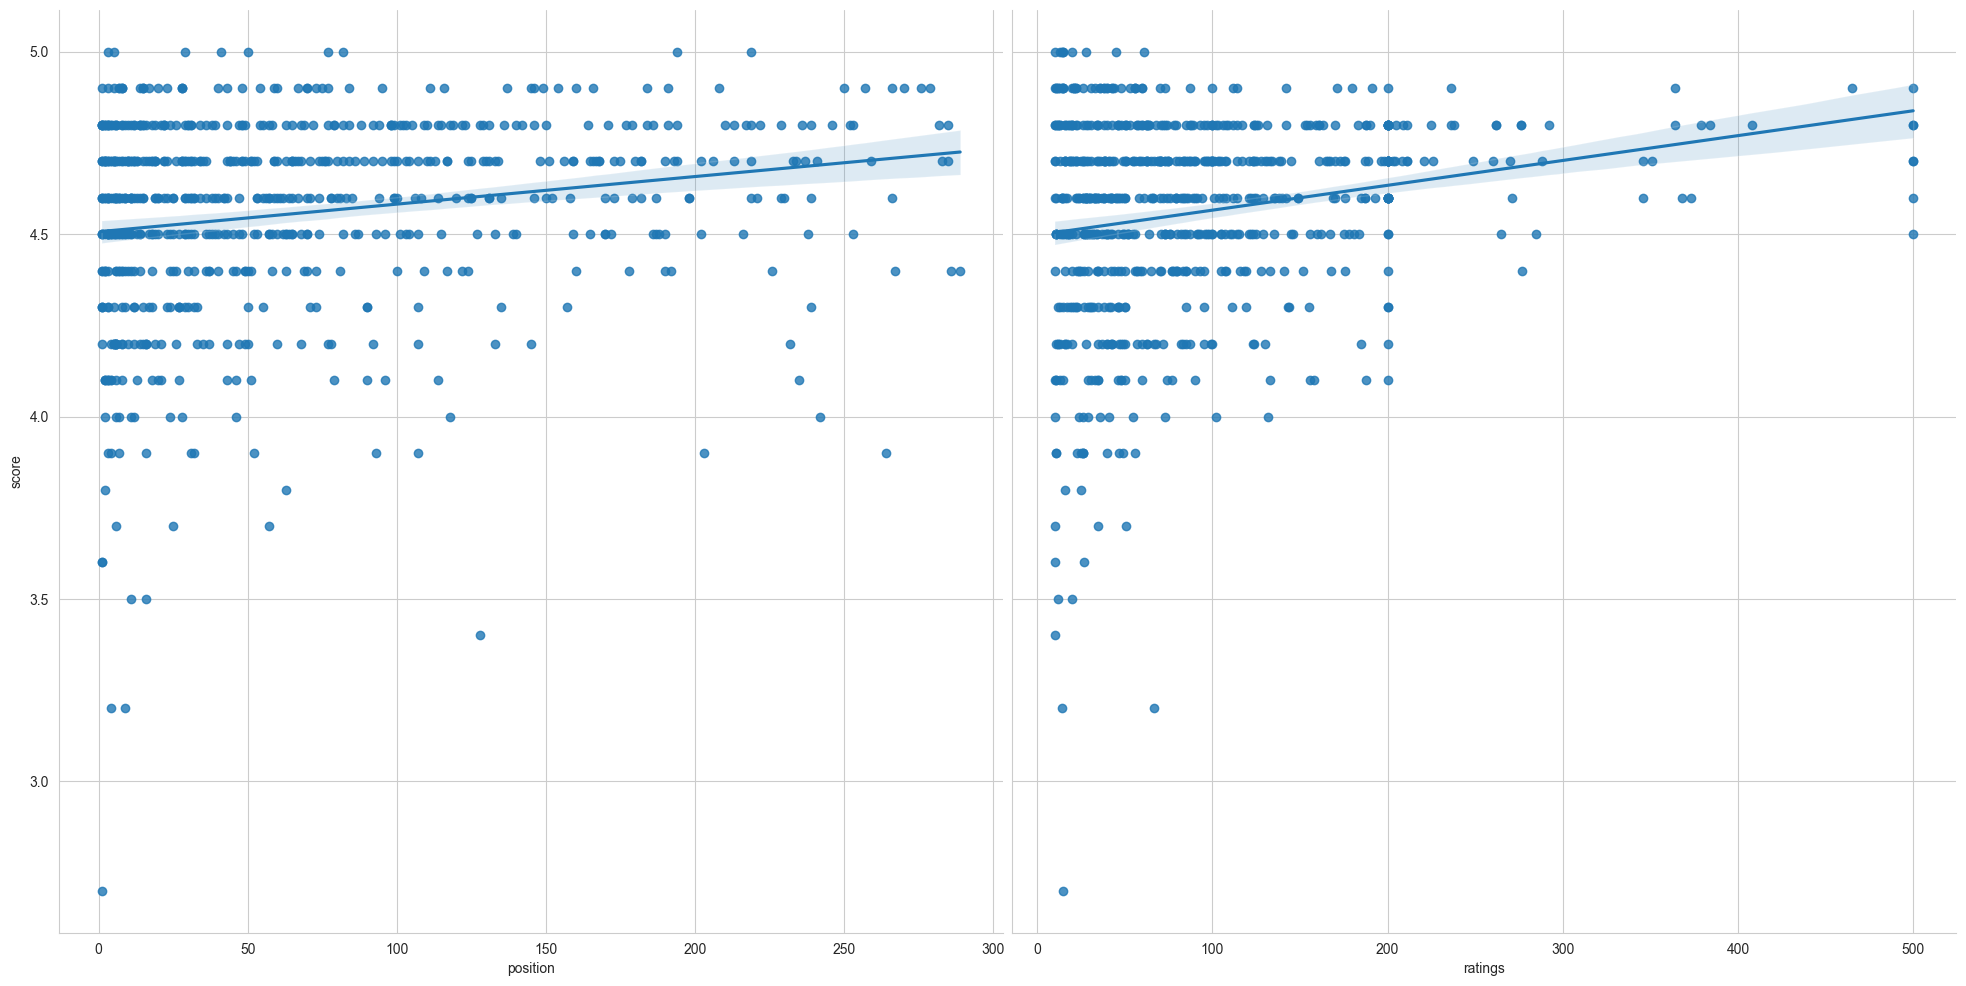

In [57]:
import matplotlib.pyplot as plt #画图的基础包
import seaborn as sns #画图的高级包
sns.pairplot(df_exfood, x_vars=['position','ratings'], y_vars='score', kind='reg', height=10, aspect=1)
plt.show()